In [2]:
import osgeo
import rasterio
import numpy as np 
import shapely
import geopandas as gpd
import pandas as pd
from rasterio import mask
from shapely.geometry import mapping


In [3]:
forest_data = rasterio.open("data/gm_ve_v1/gm_ve_v1.tif")
forest = forest_data.read()

In [21]:
print(np.amin(forest))
print(np.amax(forest))
print(len(np.unique(forest)))

0
254
102


<Axes: >

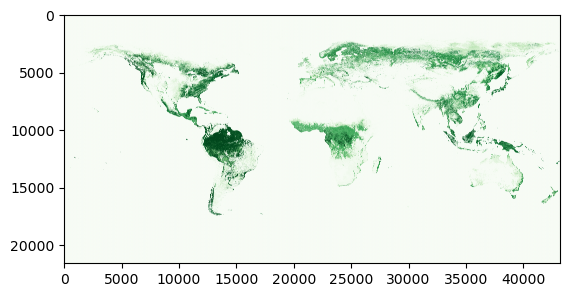

In [32]:
from rasterio.plot import show
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
show(forest, ax=ax, cmap="Greens")

In [33]:
# set no data values to zero
forest[forest==254] = 0

C:\Users\brett\AppData\Local\Temp\ipykernel_12808\3031108117.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  greens = cm.get_cmap('Greens', len(bounds)) #creates a colormap in green hue with 102 stops


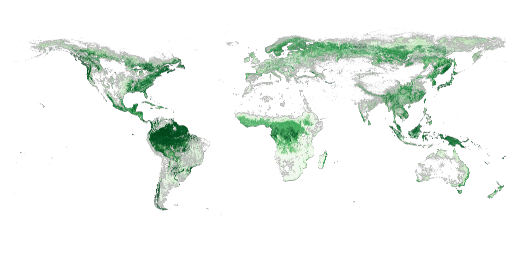

In [49]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

# using matplotlib colormaps, create a custom color map with the bounds limits and make a boundary normalization for the color map scale. ListedColormap
# greens, newcolors,newcmp_forests, norm_forests
bounds = np.arange(102)
greens = cm.get_cmap('Greens', len(bounds)) #creates a colormap in green hue with 102 stops

newcolors = greens(np.linspace(0, 1, len(bounds))) #multidim array with all colors defined
background_color = [0.0, 0.0, 0.0, 0.0]
newcolors[:1,:] = background_color

newcmp_forests = ListedColormap(newcolors)
norm_forests = BoundaryNorm(bounds, newcmp_forests.N)

fig, ax = plt.subplots()
show(forest, ax=ax, cmap=newcmp_forests, norm=norm_forests)

ax.axis('off')
plt.show()
                   


In [5]:
# Project with both rioxarray and rasterio - two methods

import rioxarray as rxr
from rasterio.crs import CRS

forests_file = rxr.open_rasterio('data/gm_ve_v1/gm_ve_v1.tif')
print('orig. projection: ', forests_file.rio.crs)
crs_rob = CRS.from_string('+proj=robin')
forests = forests_file.rio.reproject(crs_rob)
print('New projection: ', forests.rio.crs)


orig. projection:  EPSG:4326
New projection:  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Robinson"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [6]:
forests.to_numpy()

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]],
      shape=(1, 33321, 65698), dtype=uint8)

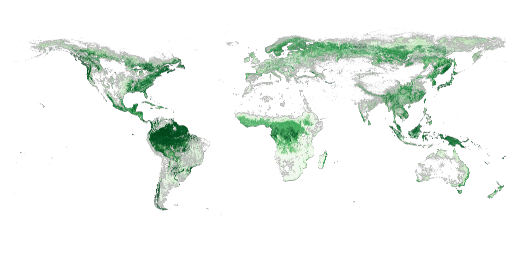

In [58]:
forest[forest > 100] = 0.0

fig, ax = plt.subplots()
show(forest, ax=ax, cmap=newcmp_forests, norm=norm_forests)

ax.axis('off')
plt.show()

In [ ]:

df = gpd.read_file("../map2_lines/natural_earth/ne_10m_admin_0_countries.shp")
north_am = df.loc[df['CONTINENT'] == 'North America']
print(north_am)



          featurecla  scalerank  LABELRANK                        SOVEREIGNT  \
28   Admin-0 country          0          5                        Costa Rica   
29   Admin-0 country          0          5                         Nicaragua   
37   Admin-0 country          3          6                            France   
38   Admin-0 country          3          6                       Netherlands   
112  Admin-0 country          0          5                             Haiti   
113  Admin-0 country          0          5                Dominican Republic   
116  Admin-0 country          0          6                       El Salvador   
117  Admin-0 country          0          3                         Guatemala   
133  Admin-0 country          0         10                              Cuba   
134  Admin-0 country          0          3                              Cuba   
135  Admin-0 country          0          5                          Honduras   
154  Admin-0 country          0         

In [14]:
import geopandas as gpd

from shapely.geometry import mapping
from rasterio.mask import mask


clipped_array = mask(forests_file, [mapping(geom) for geom in (north_am.geometry.tolist())], crop=True, nodata=0)

AttributeError: 'DataArray' object has no attribute 'transform'